# Decision-tree classifier
# input features:
## 1. hue
## 2. saturation
## 3. brightness_global
## 4. dynamic range
## 5. contract_Mic
## 6. contrast_RMS
## 7. title length

In [2]:
#######################################################
# given an image name and a video title, return the input features
import cv2
import numpy as np

def compute_image_features(img_name, video_title):
    in_features = [] # [hue, sat, bri_global, dynamic_range, contrast_Mic, contrast_RMS, len_title]
    
    #####################################
    # use openCV compute 
    # global hue, saturation, birightness (value)
    # dynamic range, Michelson contrast and RMS contrast
    try:
        img = cv2.imread(img_name)
    except Exception as e:
        print("Please upload an image!")
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hue = img_hsv.mean(axis=(0,1))[0]/179
    in_features.append(hue)
    sat = img_hsv.mean(axis=(0,1))[1]/255
    in_features.append(sat)
    bri_global = img_hsv.mean(axis=(0,1))[2]/255 # value = brightness
    in_features.append(bri_global)
    #print("The global hue, saturation, brightness: ({0}, {1}, {2})".format(hue, sat, bri_global))

    bri = img_hsv[:, :, 2]/255 # matrix of all pixel, normalized

    ###############################################
    # compute Michelson contrast
    bri_max = bri.max()
    bri_min = bri.min()
    contrast_Mic = (bri_max - bri_min) / (bri_max + bri_min)
    #print("bri_max - {0}, bri_min - {1}, contrast_Mic -{2}".format(bri_max, bri_min, contrast_Mic))
    #print("The Michelson contrast of this image is {0}".format(contrast_Mic))

    # compute dynamic range
    dynamic_range = bri_max - bri_min
    in_features.append(dynamic_range)
    in_features.append(contrast_Mic)
    #print("The dynamic range of this image is {0}".format(dynamic_range))

    # compute RMS contrast
    bri_norm = bri / bri_max # 1st, normalize the brightness matrix
    contrast_RMS = bri_norm.std(axis=(0,1))
    in_features.append(contrast_RMS)
    #print ("The RMS contrast of this image is {0}".format(contrast_RMS))
    try:
        len_title = len(video_title)
    except Exception as e:
        print("Please enter a video title...")
    in_features.append(len_title)
    
    return np.array(in_features)

# Unpoupular:

1. 930_rbLMoT0, Makeup Collection!

2. 20rPkUQFkM8, Haul With Caity:)

3. fXb8wUrcjNk, Philadelphia

# Popular

1. 7MzCD3hScOY, DRUGSTORE BACK TO SCHOOL MAKEUP TUTORIAL

2. 

In [26]:
#######################
# input
video_title = "Haul With Caity:)"
image_feature = compute_image_features("20rPkUQFkM8.jpg", video_title)

#######################
# import the model
from sklearn.externals import joblib
clf = joblib.load('model_DTs_global_depth_2.pkl')

#######################
# predict
if clf.predict(image_feature.reshape(1, -1)) == 1:
    print("The thumbnail image and title look AWESOME!!!!")
else:
    print("You might want to modify the thumbnail image and title of your video to optimize its impact!")

You might want to modify the thumbnail image and title of your video to optimize its impact!


# compute input features

In [28]:
###############################################
# compute the input features of an image
# golbal + len_title + date_approx + token (300)
###############################################


###############################################
# global features
###############################################
def get_image_input_features(img):
    # input: img -> RGB
    img_features_global = []
    
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV) #BGR --> HSV
    hue = img_hsv.mean(axis=(0,1))[0]/179
    sat = img_hsv.mean(axis=(0,1))[1]/255
    bri_global = img_hsv.mean(axis=(0,1))[2]/255 # value = brightness
    #print("The global hue, saturation, brightness: ({0}, {1}, {2})".format(hue, sat, bri_global))

    bri = img_hsv[:, :, 2]/255 # matrix of all pixel, normalized

    # compute Michelson contrast
    bri_max = bri.max()
    bri_min = bri.min()
    contrast_Mic = (bri_max - bri_min) / (bri_max + bri_min)
    #print("bri_max - {0}, bri_min - {1}, contrast_Mic -{2}".format(bri_max, bri_min, contrast_Mic))
    #print("The Michelson contrast of this image is {0}".format(contrast_Mic))

    # compute dynamic range
    dynamic_range = bri_max - bri_min
    #print("The dynamic range of this image is {0}".format(dynamic_range))

    # compute RMS contrast
    bri_norm = bri / bri_max # 1st, normalize the brightness matrix
    contrast_RMS = bri_norm.std(axis=(0,1))
    #print ("The RMS contrast of this image is {0}".format(contrast_RMS))
    
    img_features_global = [hue, sat, bri_global, dynamic_range, contrast_Mic, contrast_RMS]
    return img_features_global

###############################################
# token indicator
###############################################
def get_token_indicator(video_title):
    title = nltk.word_tokenize(video_title)
    title = [w.lower() for w in title if w.isalpha()] # the indicator vector for this title
    return [int(x in title) for x in common_words]

###############################################
# all input features 
###############################################
def get_all_input_features(img, video_title, common_words):
    # img: RGB
    before_features = get_image_input_features(img)
    before_features.append(len(video_title))
    before_features.append(0)
    before_features = before_features + get_token_indicator(video_title)
    return (before_features)

###############################################
# obtain enhance images
###############################################
def get_enhanced_image(file_name, video_title, clf, common_words):
    filename = "/Users/yaoli/02_JobApplications/03_DataScience/insight/project/git_tracked/insight-project/web_app/flaskefiles/upload/" + file_name
    img_format = Image.open(filename)
    img_original = cv2.imread(filename) #BGR
    img_original = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB) #RGB
    
    features_before = get_all_input_features(img_original, video_title, common_words)
    x_sample = array(features_before).reshape(1, -1)
    prob_before = clf.predict_proba(x_sample)[0, 1] #probability of being popular
    
    #itr = [1, 1.05, 1.1, 1.15]
    itr = [1, 1.05, 1.1, 1.15, 1.2]
    #itr = [0.9, 1, 1.1, 1.2, 1.3
    prob_best = prob_before
    img_best = img_format #RGB, not array, image format
    filter_best = []

    for i in itr:
        for j in itr:
            for k in itr:
                #print([i, j, k])
                img_after = ImageEnhance.Color(img_format).enhance(i)
                img_after = ImageEnhance.Brightness(img_after).enhance(j)
                img_after_RGB = ImageEnhance.Contrast(img_after).enhance(k) #RGB
                
                features_after = get_image_input_features(array(img_after_RGB))
                features_after = features_after + features_before[6:]
                x_sample = array(features_after).reshape(1, -1)                
                prob_after = clf.predict_proba(x_sample)[0, 1]
                if prob_after > prob_best:
                    img_best = img_after_RGB #RGB
                    prob_best = prob_after
                    filter_best = [i, j, k]
    if prob_best == prob_before:
        message = "The high-impact chance is already very high: {0}%. So your thumbnail image is kept.".format(100*prob_best)
        img_best = img_format 
    else:
        message = "The chance of high impact can be improved from {0}% to {1}% by changing color by {2}, brightness by {3}, and contrast by {4}".format(100*prob_before, 100*prob_best, filter_best[0], filter_best[1], filter_best[2]) 

    return (message, img_best)  

The chance of high impact can be improved from 18.75% to 27.500000000000004% by changing color by 1.2, brightness by 1.2, and contrast by 1.15


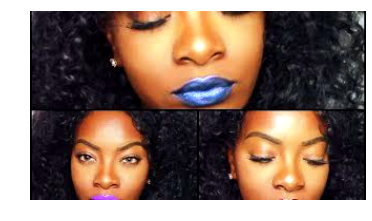

(<matplotlib.image.AxesImage at 0x10324e470>, None)

In [29]:
####################
# compute the input features of an image
# golbal + len_title + date_approx + token (300)
import numpy as np
import cv2
import math
import sys
import nltk
import codecs
import pickle
from numpy import array
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from sklearn.externals import joblib
from PIL import Image, ImageEnhance
%matplotlib inline

#######################
# import the model
clf = joblib.load('model_RF_160_estimators_300_tokens_noRegional_noCluster.pkl')

#######################
# prepare token list
with open("title_token_list", 'rb') as f:
    common_words = pickle.load(f)
common_words = common_words[:300]

img_name = "SD9dUhhFYEE.jpg"
video_title = "Peeks Cosmetics Review"

enhanced_img = get_enhanced_image(img_name, video_title, clf, common_words)

print(enhanced_img[0])

plt.axis("off")
plt.imshow(enhanced_img[1]),plt.show()

In [31]:
type(enhanced_img[1])

PIL.Image.Image

In [32]:
img = enhanced_img[1]

In [33]:
img.save("/Users/yaoli/02_JobApplications/03_DataScience/insight/project/git_tracked/insight-project/web_app/flaskefiles/static/test_1.jpg", "JPEG")